In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [58]:
df2 = pd.read_csv('dfnew_cek2.csv')
df2.drop(columns='Unnamed: 0', inplace=True)

# **EDA**

In [59]:
df2.head()

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
0,Bekasi Utara,60,57,3,3,851000000
1,Bekasi Barat,104,104,3,2,700000000
2,Bekasi Utara,88,88,2,2,430000000
3,Bekasi Utara,72,50,3,1,375000000
4,Bekasi Timur,60,50,2,1,400000009


**Sebelum Menghilangkan Outlier**

In [60]:
df2.describe() # Untuk fitur numerik

,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
count,6089.000000,6089.000000,6089.000000,6089.000000,6.089000e+03
mean,119.401872,111.755296,2.986533,2.023485,1.127644e+09
std,124.079535,114.650561,1.278736,1.257020,1.101809e+09
min,24.000000,18.000000,1.000000,1.000000,1.550000e+08
25%,64.000000,50.000000,2.000000,1.000000,4.880000e+08
50%,85.000000,80.000000,3.000000,2.000000,7.800000e+08
75%,126.000000,130.000000,4.000000,2.000000,1.350000e+09
max,2200.000000,1500.000000,10.000000,10.000000,9.700000e+09


In [61]:
df2.describe(exclude = np.number) # Untuk fitur kategorik

,kecamatan
count,6089
unique,12
top,Jatiasih
freq,1131


Visualisasi berdasarkan kecamatan

In [62]:
by_kecamatan = df2.groupby(['kecamatan']).mean()

In [63]:
by_kecamatan.reset_index(inplace=True)

In [111]:
by_kecamatan

,kecamatan,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
0,Bantar Gebang,148.791045,130.611940,3.0,2.0,1.321313e+09
1,Bekasi Barat,118.978626,117.438168,3.0,2.0,1.231222e+09
2,Bekasi Selatan,149.281008,138.323643,3.0,2.0,1.578277e+09
3,Bekasi Timur,113.446064,98.253644,2.0,1.0,9.549756e+08
4,Bekasi Utara,92.530095,87.904963,2.0,1.0,7.848219e+08
5,Jati Sampurna,156.193103,151.306897,3.0,2.0,1.824827e+09
6,Jatiasih,106.219275,101.300619,2.0,1.0,9.513081e+08
7,Medan Satria,112.214286,121.527473,3.0,2.0,1.189009e+09
8,Mustika Jaya,100.068826,75.034413,2.0,1.0,7.181915e+08
9,Pondok Gede,146.687988,140.336973,3.0,2.0,1.443249e+09


In [70]:
by_kecamatan['kamar tidur'] = by_kecamatan['kamar tidur'].apply(np.floor)
by_kecamatan['kamar mandi'] = by_kecamatan['kamar mandi'].apply(np.floor)

In [72]:
def billions(x, pos):
    return 'Rp.%1.1fM' % (x*1e-9)

formatter = FuncFormatter(billions)


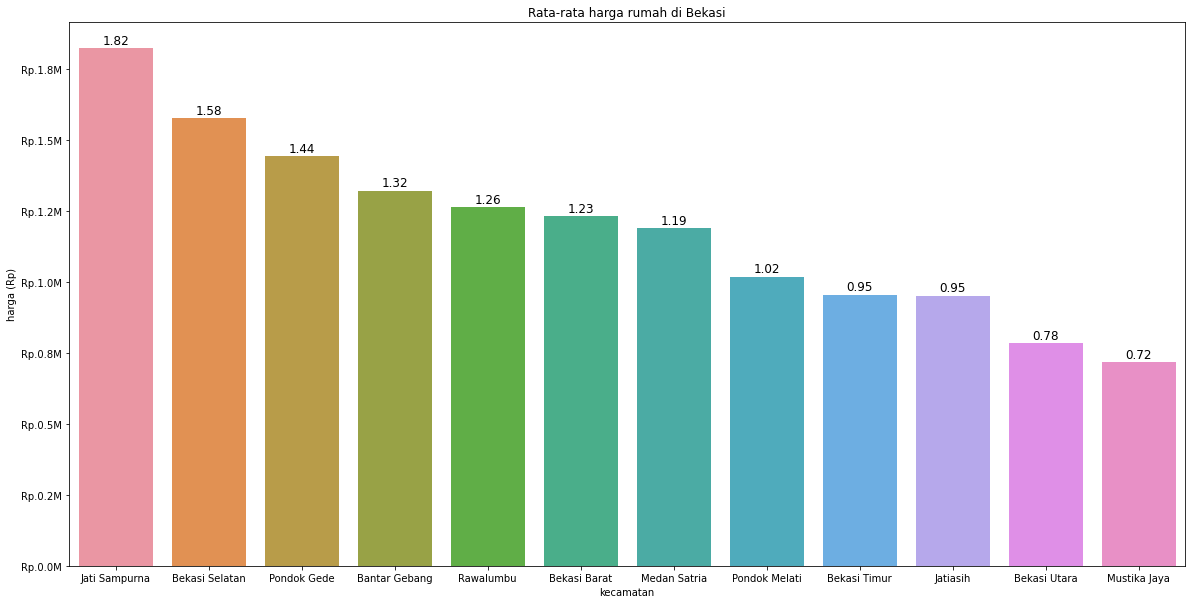

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

ax = sns.barplot(x="kecamatan", y="harga (Rp)", data=by_kecamatan.sort_values('harga (Rp)', ascending=False))



ax.set_title('Rata-rata harga rumah di Bekasi')
ax.yaxis.set_major_formatter(formatter)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format((bar.get_height()*1e-9), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

Jati Sampurna menjadi kecamatan dengan rata-rata harga rumah tertinggi, sedangkan mustika jaya sebaliknya. 

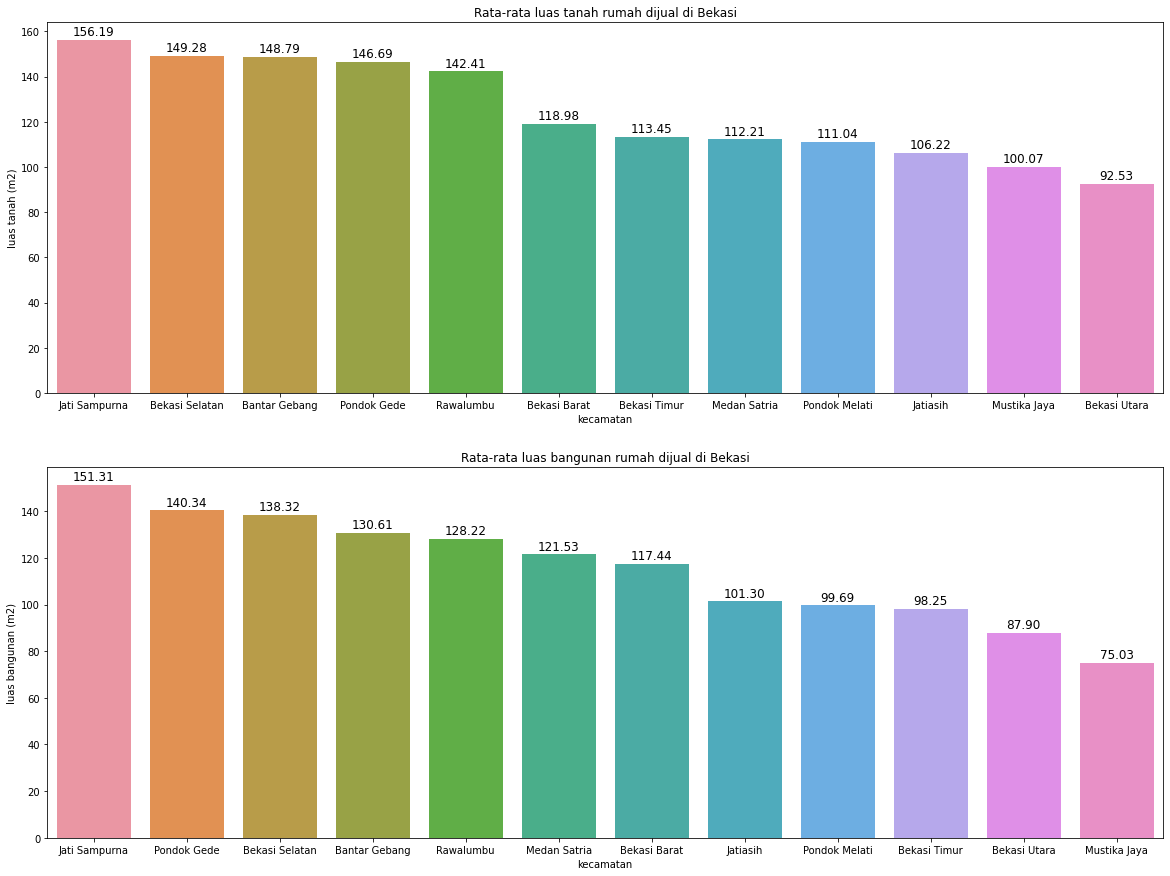

In [76]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15), sharex=False)

ax0 = sns.barplot(x="kecamatan", y="luas tanah (m2)", data=by_kecamatan.sort_values('luas tanah (m2)', ascending=False), ax=ax[0])
ax1 = sns.barplot(x="kecamatan", y="luas bangunan (m2)", data=by_kecamatan.sort_values('luas bangunan (m2)', ascending=False), ax=ax[1])


ax0.set_title('Rata-rata luas tanah rumah dijual di Bekasi')
ax1.set_title('Rata-rata luas bangunan rumah dijual di Bekasi')
# ax.yaxis.set_major_formatter(formatter)

for i in [0,1]:

  for bar in ax[i].patches:
    
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      ax[i].annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

Sekarang kita lanjut berdasarkan keseluruhan atau dengan kata lain mengabaikan label kecamatan karena tujuan utamanya adalah se-kota bekasi.

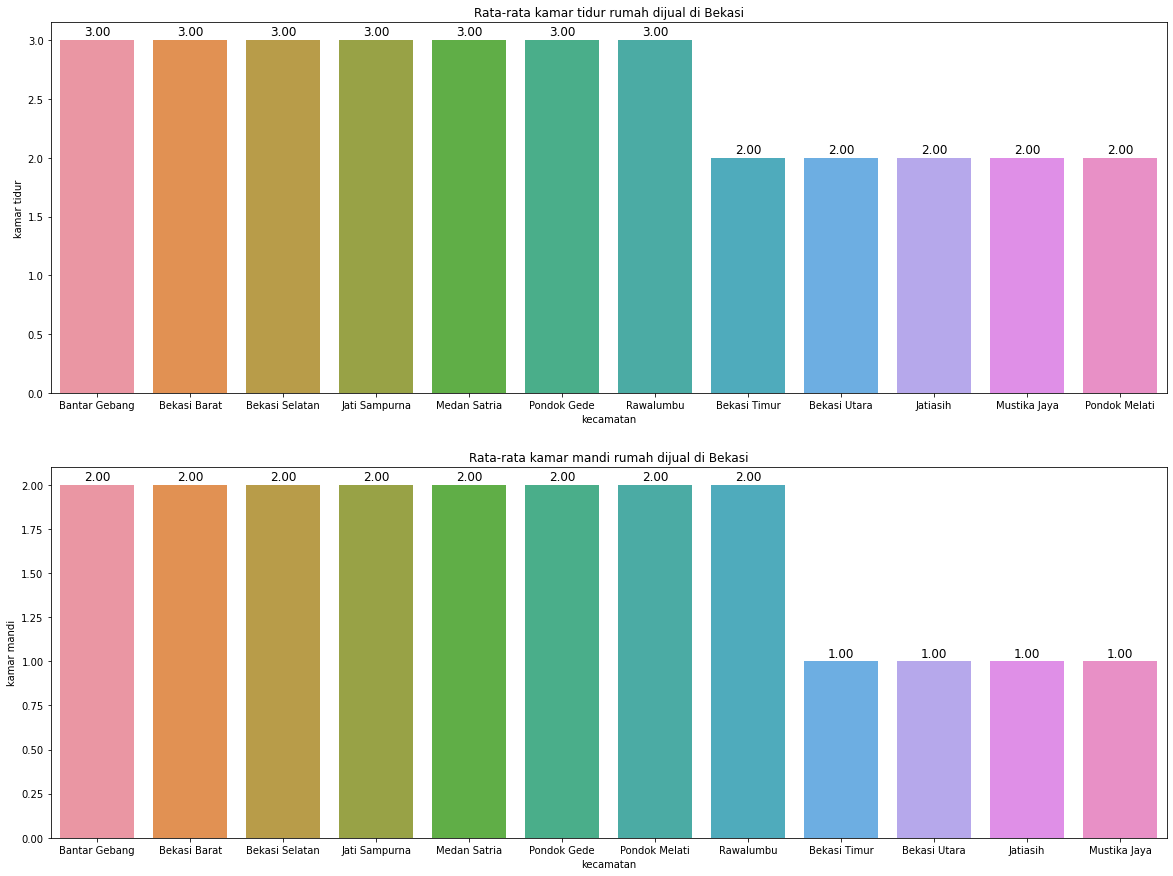

In [77]:


fig, ax = plt.subplots(2, 1, figsize=(20, 15), sharex=False)


ax0 = sns.barplot(x="kecamatan", y="kamar tidur", data=by_kecamatan.sort_values('kamar tidur', ascending=False), ax=ax[0])
ax1 = sns.barplot(x="kecamatan", y="kamar mandi", data=by_kecamatan.sort_values('kamar mandi', ascending=False), ax=ax[1])


ax0.set_title('Rata-rata kamar tidur rumah dijual di Bekasi')
ax1.set_title('Rata-rata kamar mandi rumah dijual di Bekasi')
# ax.yaxis.set_major_formatter(formatter)

for i in [0,1]:

  for bar in ax[i].patches:
    
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      ax[i].annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

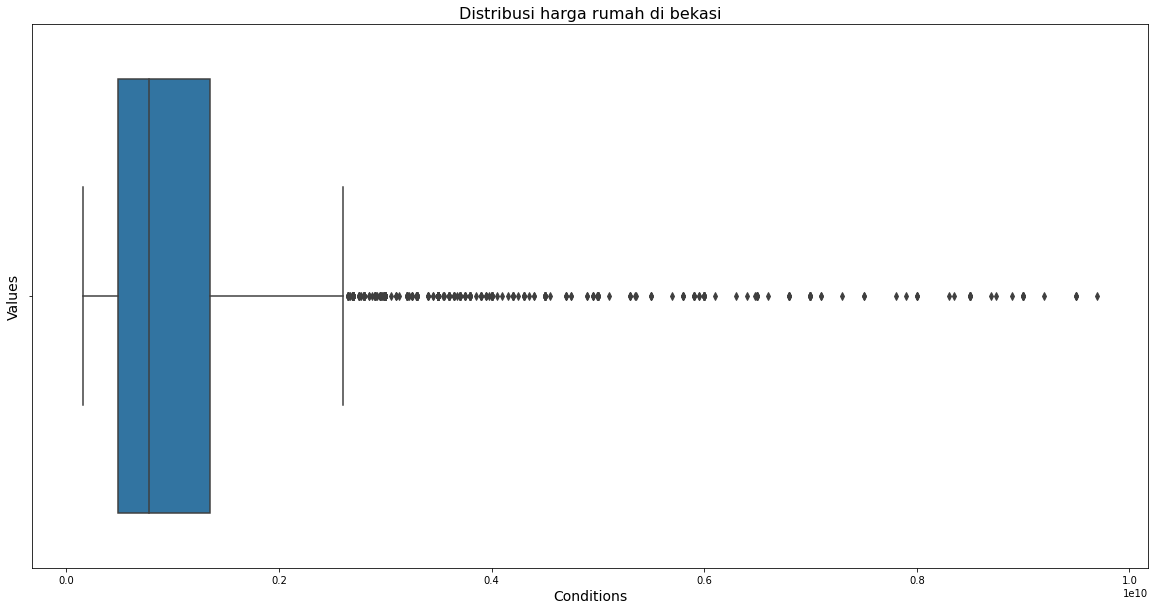

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot = sns.boxplot(x="harga (Rp)", data=df2)
boxplot.axes.set_title("Distribusi harga rumah di bekasi", fontsize=16)
boxplot.set_xlabel("Conditions", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

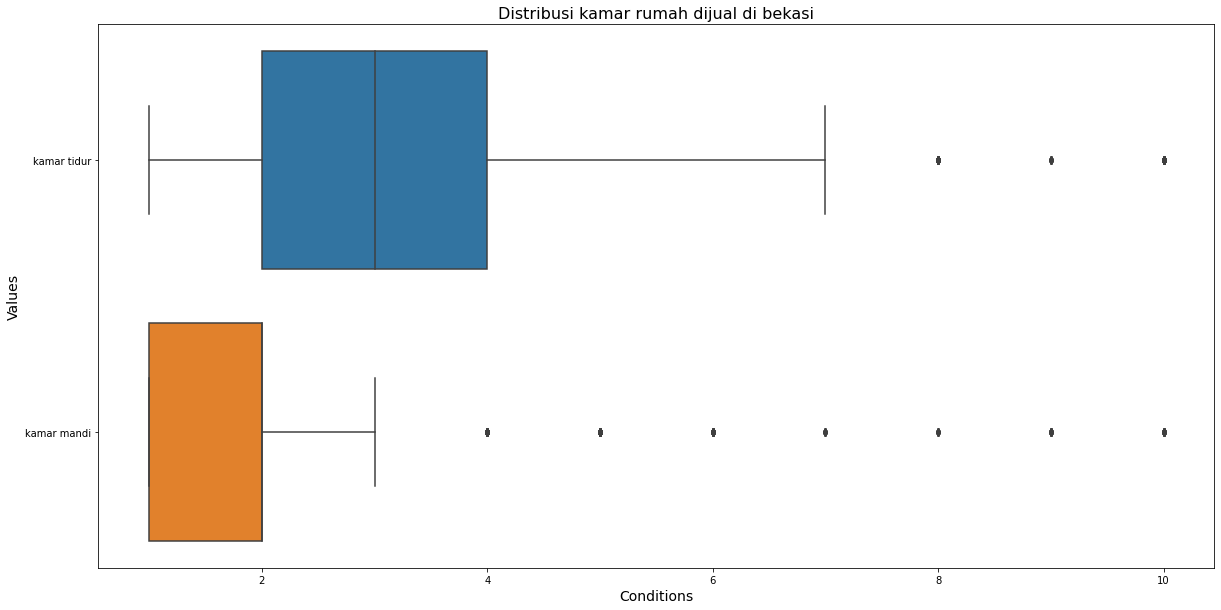

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot2 = sns.boxplot(y="variable", x='value', data=pd.melt(df2.drop(columns=['kecamatan','harga (Rp)','luas bangunan (m2)', 'luas tanah (m2)'])))
boxplot2.axes.set_title("Distribusi kamar rumah dijual di bekasi", fontsize=16)
boxplot2.set_xlabel("Conditions", fontsize=14)
boxplot2.set_ylabel("Values", fontsize=14)
plt.show()

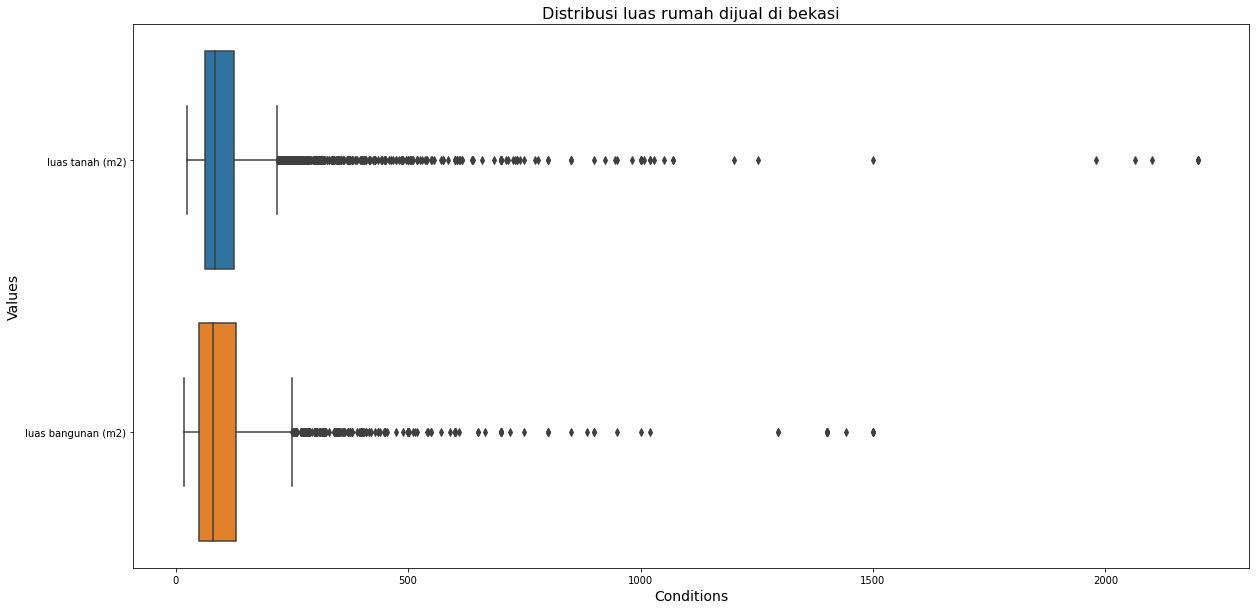

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

boxplot3 = sns.boxplot(y="variable", x='value', data=pd.melt(df2.drop(columns=['kecamatan','harga (Rp)','kamar tidur', 'kamar mandi'])))
boxplot3.axes.set_title("Distribusi luas rumah dijual di bekasi", fontsize=16)
boxplot3.set_xlabel("Conditions", fontsize=14)
boxplot3.set_ylabel("Values", fontsize=14)
plt.show()

**Setelah menghilangkan Outlier**

In [78]:
df_out = df2.copy()

In [79]:
df_out.describe()

,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
count,6089.000000,6089.000000,6089.000000,6089.000000,6.089000e+03
mean,119.401872,111.755296,2.986533,2.023485,1.127644e+09
std,124.079535,114.650561,1.278736,1.257020,1.101809e+09
min,24.000000,18.000000,1.000000,1.000000,1.550000e+08
25%,64.000000,50.000000,2.000000,1.000000,4.880000e+08
50%,85.000000,80.000000,3.000000,2.000000,7.800000e+08
75%,126.000000,130.000000,4.000000,2.000000,1.350000e+09
max,2200.000000,1500.000000,10.000000,10.000000,9.700000e+09


In [84]:
for column in df_out.drop(columns="kecamatan").columns:
  out1 = df_out[column].quantile(0.25) #q1
  out2 = df_out[column].quantile(0.5) #median
  out3 = df_out[column].quantile(0.75) #q2
  out4 = out3-out1
  # Minor outlier detection
  out4a = out4*1.5
  out5a,out5b = out1+out4a,out3+out4a
  # Mayor outlier detection
  out4b = out4*3
  out6a,out6b = out1+out4b,out3+out4b
  print("Jumlah outlier " + column + " = {} \n".format(df_out[df_out[column]>=out5b].shape[0]))

Jumlah outlier luas tanah (m2) = 545 

Jumlah outlier luas bangunan (m2) = 456 

Jumlah outlier kamar tidur = 123 

Jumlah outlier kamar mandi = 635 

Jumlah outlier harga (Rp) = 445 



In [85]:
df_out.drop(df_out[(df_out['harga (Rp)'] >= out5b)].index, inplace=True)
df_out.shape

(5644, 6)

In [86]:
by_kec_out = df_out.groupby(['kecamatan']).mean()

In [87]:
by_kec_out.reset_index(inplace=True)

In [88]:
by_kec_out['kamar tidur'] = by_kec_out['kamar tidur'].apply(np.floor)
by_kec_out['kamar mandi'] = by_kec_out['kamar mandi'].apply(np.floor)

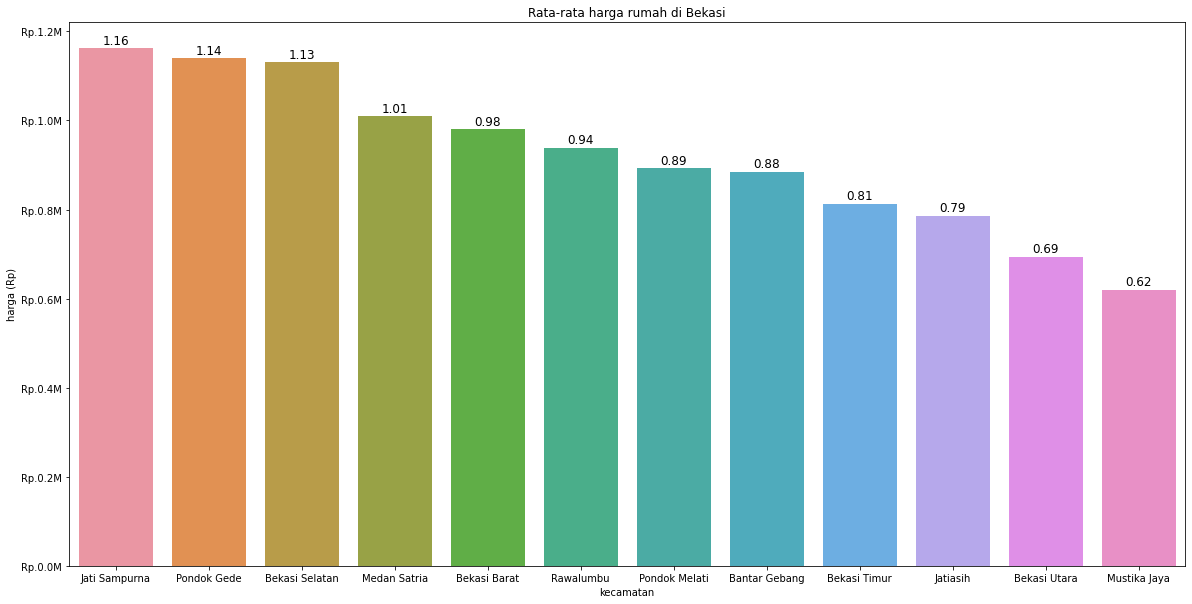

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), sharex=False)

ax = sns.barplot(x="kecamatan", y="harga (Rp)", data=by_kec_out.sort_values('harga (Rp)', ascending=False))



ax.set_title('Rata-rata harga rumah di Bekasi')
ax.yaxis.set_major_formatter(formatter)

for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format((bar.get_height()*1e-9), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

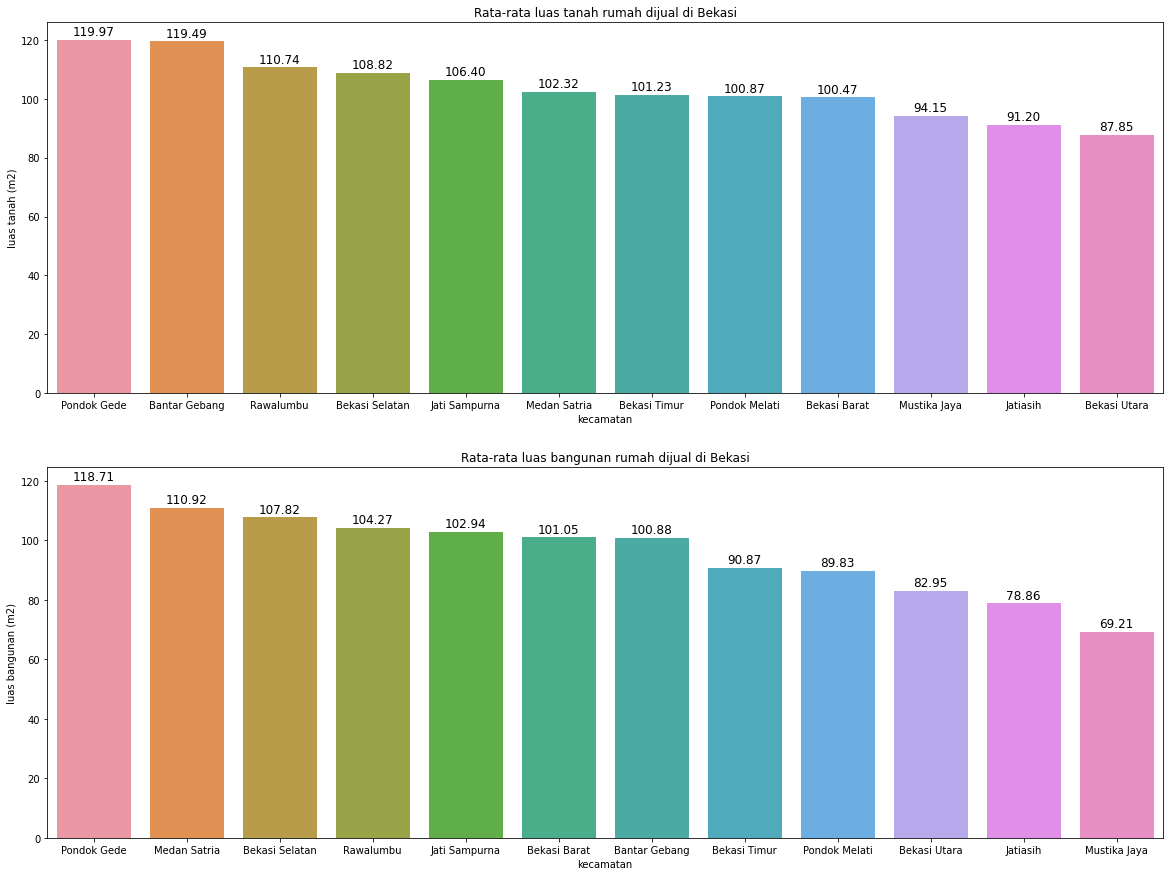

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15), sharex=False)

ax0 = sns.barplot(x="kecamatan", y="luas tanah (m2)", data=by_kec_out.sort_values('luas tanah (m2)', ascending=False), ax=ax[0])
ax1 = sns.barplot(x="kecamatan", y="luas bangunan (m2)", data=by_kec_out.sort_values('luas bangunan (m2)', ascending=False), ax=ax[1])


ax0.set_title('Rata-rata luas tanah rumah dijual di Bekasi')
ax1.set_title('Rata-rata luas bangunan rumah dijual di Bekasi')
# ax.yaxis.set_major_formatter(formatter)

for i in [0,1]:

  for bar in ax[i].patches:
    
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      ax[i].annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

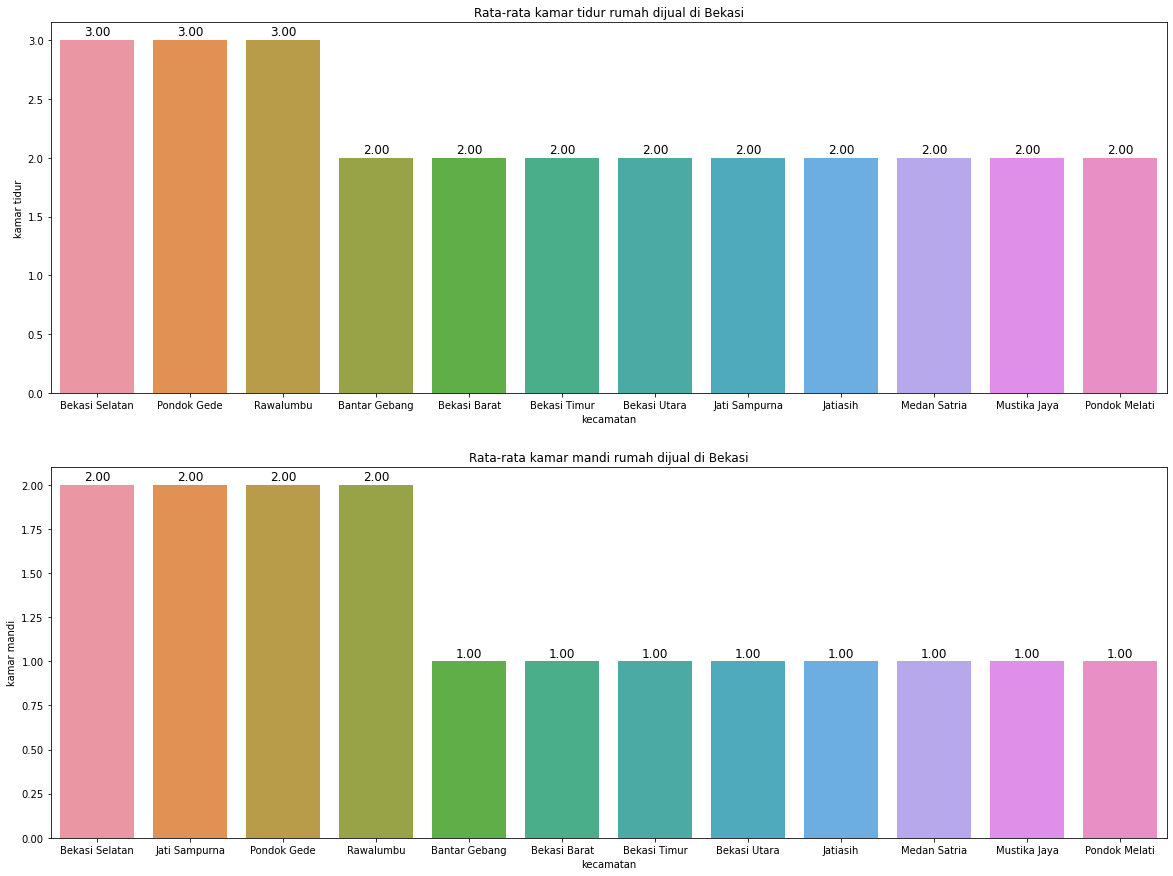

In [91]:


fig, ax = plt.subplots(2, 1, figsize=(20, 15), sharex=False)


ax0 = sns.barplot(x="kecamatan", y="kamar tidur", data=by_kec_out.sort_values('kamar tidur', ascending=False), ax=ax[0])
ax1 = sns.barplot(x="kecamatan", y="kamar mandi", data=by_kec_out.sort_values('kamar mandi', ascending=False), ax=ax[1])


ax0.set_title('Rata-rata kamar tidur rumah dijual di Bekasi')
ax1.set_title('Rata-rata kamar mandi rumah dijual di Bekasi')
# ax.yaxis.set_major_formatter(formatter)

for i in [0,1]:

  for bar in ax[i].patches:
    
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      ax[i].annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

Inspeksi outlier setelah sebelumnya dihilangkan

In [95]:
for column in df_out.drop(columns="kecamatan").columns:
  out1 = df_out[column].quantile(0.25) #q1
  out2 = df_out[column].quantile(0.5) #median
  out3 = df_out[column].quantile(0.75) #q2
  out4 = out3-out1
  # Minor outlier detection
  out4a = out4*1.5
  out5a,out5b = out1+out4a,out3+out4a
  # Mayor outlier detection
  out4b = out4*3
  out6a,out6b = out1+out4b,out3+out4b
  print("Jumlah outlier " + column + " = {} \n".format(df_out[df_out[column]>=out5b].shape[0]))

Jumlah outlier luas tanah (m2) = 346 

Jumlah outlier luas bangunan (m2) = 288 

Jumlah outlier kamar tidur = 346 

Jumlah outlier kamar mandi = 338 

Jumlah outlier harga (Rp) = 167 



Ternyata ada outlier baru efek penghilangan sebelumnya. Maka data yang dipakai untuk modelling kedepan dipilih yang dengan outlier awal karena dianggap outlier nya tidak masalah dan susah melalui inspeksi pada data preparation.

<function matplotlib.pyplot.show>

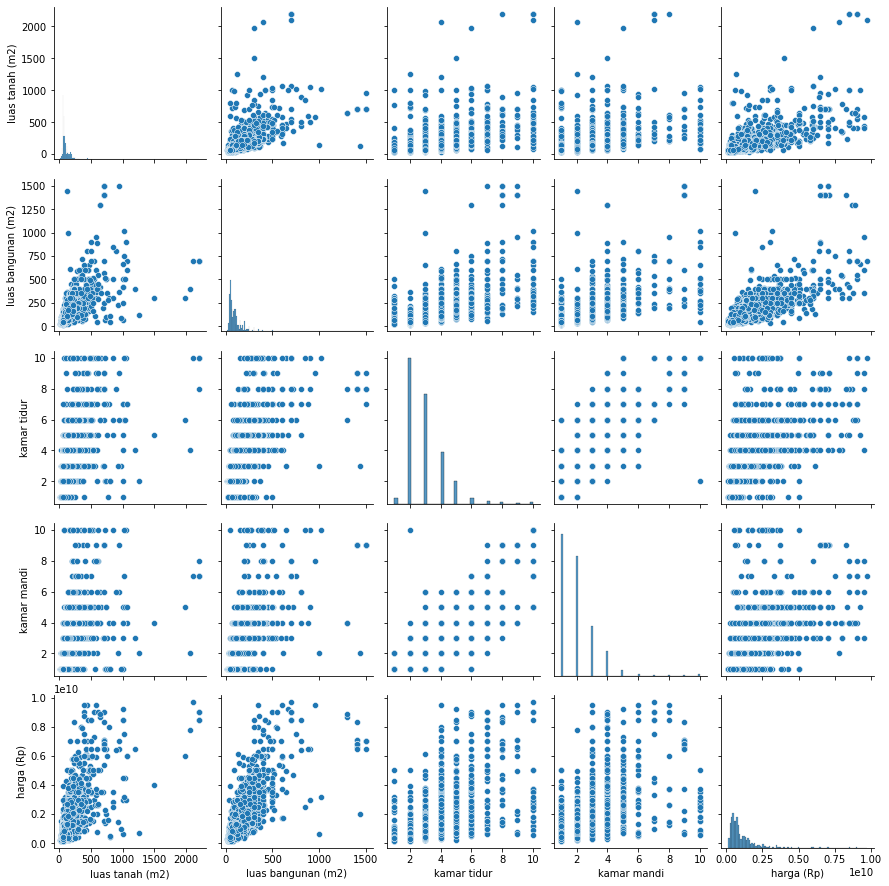

In [96]:
sns.pairplot(df2)
plt.show

In [107]:
df2.corr().style.background_gradient(cmap='YlOrRd')

,luas tanah (m2),luas bangunan (m2),kamar tidur,kamar mandi,harga (Rp)
luas tanah (m2),1.000000,0.675525,0.567494,0.537695,0.720937
luas bangunan (m2),0.675525,1.000000,0.703415,0.709932,0.776209
kamar tidur,0.567494,0.703415,1.000000,0.841822,0.674226
kamar mandi,0.537695,0.709932,0.841822,1.000000,0.681671
harga (Rp),0.720937,0.776209,0.674226,0.681671,1.000000


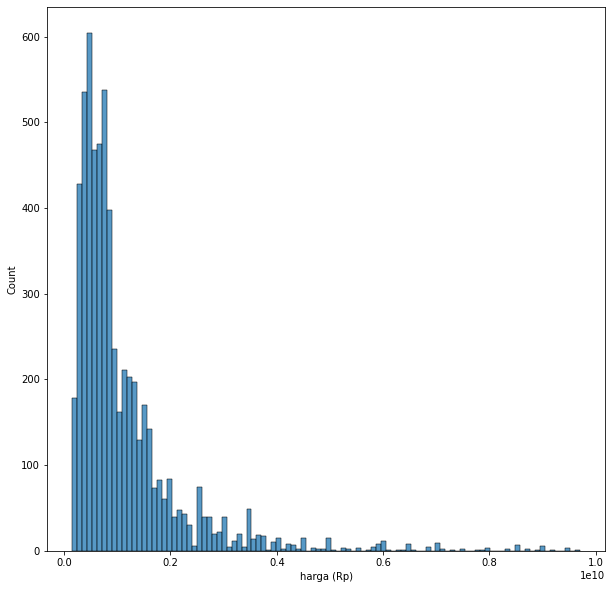

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=False)

ax = sns.histplot(x="harga (Rp)", data=df2.sort_values('harga (Rp)', ascending=False))
